In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from scipy.optimize import curve_fit
import numpy as np

In [33]:
res = xlrd.open_workbook('Spot+and+Futures.xlsx')

In [34]:
tableal = res.sheets()[12]
tablecopper = res.sheets()[11]
tablelead = res.sheets()[9]
tablezinc = res.sheets()[10]
tabletin = res.sheets()[7]
tablenickel = res.sheets()[8]

tableal1 = res.sheets()[13]
tablecopper1 = res.sheets()[14]
tablelead1 = res.sheets()[16]
tablezinc1 = res.sheets()[15]
tabletin1 = res.sheets()[18]
tablenickel1 = res.sheets()[17]

In [35]:
inv_al = tableal.col_values(2)
inv_copper = tablecopper.col_values(2)
inv_lead = tablelead.col_values(3)
inv_nickel = tablenickel.col_values(2)
inv_zinc = tablezinc.col_values(2)
inv_tin = tabletin.col_values(2)


spd_al = tableal.col_values(0)
spd_copper = tablecopper.col_values(0)
spd_lead = tablelead.col_values(2)
spd_nickel = tablenickel.col_values(1)
spd_zinc = tablezinc.col_values(0)
spd_tin = tabletin.col_values(1)


y_inv_al = tableal1.col_values(4)
y_inv_copper = tablecopper1.col_values(4)
y_inv_lead = tablelead1.col_values(5)
y_inv_nickel = tablenickel1.col_values(4)
y_inv_zinc = tablezinc1.col_values(4)
y_inv_tin = tabletin1.col_values(4)

vol_al = tableal1.col_values(5)
vol_copper = tablecopper1.col_values(5)
vol_lead = tablelead1.col_values(6)
vol_nickel = tablenickel1.col_values(5)
vol_zinc = tablezinc1.col_values(5)
vol_tin = tabletin1.col_values(5)
print(type(spd_tin))


<class 'list'>


In [37]:
print(vol_al)

[-0.3217863202687912, 0.014735244143818221, 0.05221680333802985, 0.05896644575057397, 0.289660631215684, 0.012400398092467636, 0.07004754015796567]


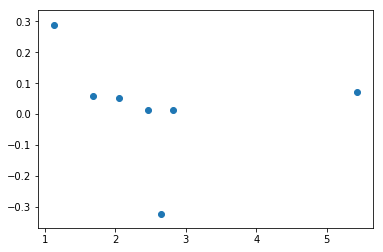

In [38]:
plt.scatter(y_inv_al,vol_al)
plt.show()



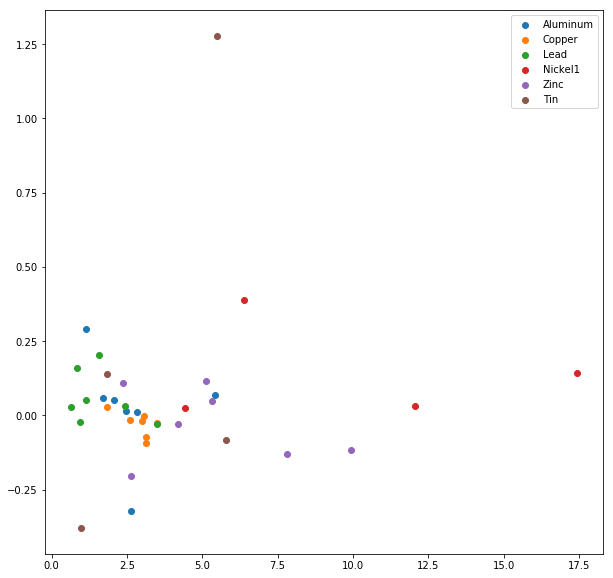

In [43]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

#sValue = inv_al*10
al2 = ax1.scatter(y_inv_al, vol_al)
copper2 = ax1.scatter(y_inv_copper, vol_copper)
lead2 = ax1.scatter(y_inv_lead, vol_lead)
nickel2 = ax1.scatter(y_inv_nickel, vol_nickel)
zinc2 = ax1.scatter(y_inv_zinc, vol_zinc)
tin2 = ax1.scatter(y_inv_tin, vol_tin)
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel1', 'Zinc', 'Tin'], loc='best')
plt.savefig('fig_vol.jpg')
plt.show()

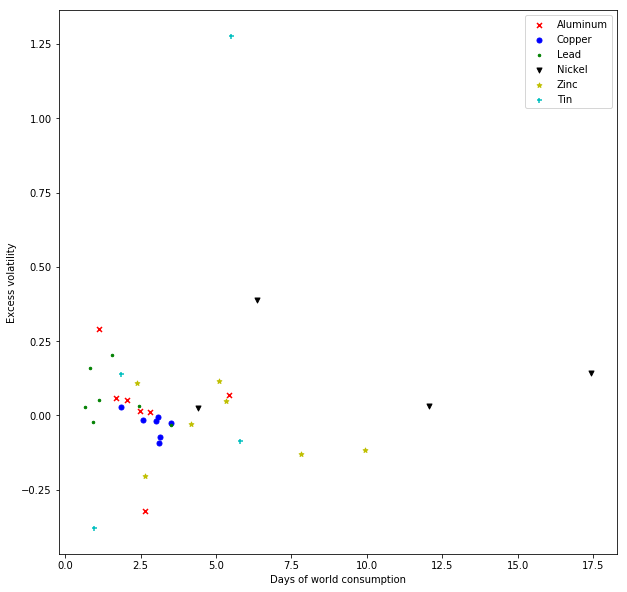

In [55]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

#sValue = inv_al*10
al2 = ax1.scatter(y_inv_al, vol_al,c='r', s=25, marker="x")
copper2 = ax1.scatter(y_inv_copper, vol_copper,c='b', s=25 ,marker="o")
lead2 = ax1.scatter(y_inv_lead, vol_lead ,c='g',  s=25 ,marker=".")
nickel2 = ax1.scatter(y_inv_nickel, vol_nickel,c='k',s=25,  marker="v")
zinc2 = ax1.scatter(y_inv_zinc, vol_zinc, c='y', s=25, marker="*")
tin2 = ax1.scatter(y_inv_tin, vol_tin, c='c',s=25 , marker="+")
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')
plt.xlabel('Days of world consumption')
plt.ylabel('Excess volatility')
#ax1.set_title('Spot volatility vs. inventory',fontsize=12)
plt.savefig('fig_vol.jpg')
plt.show()


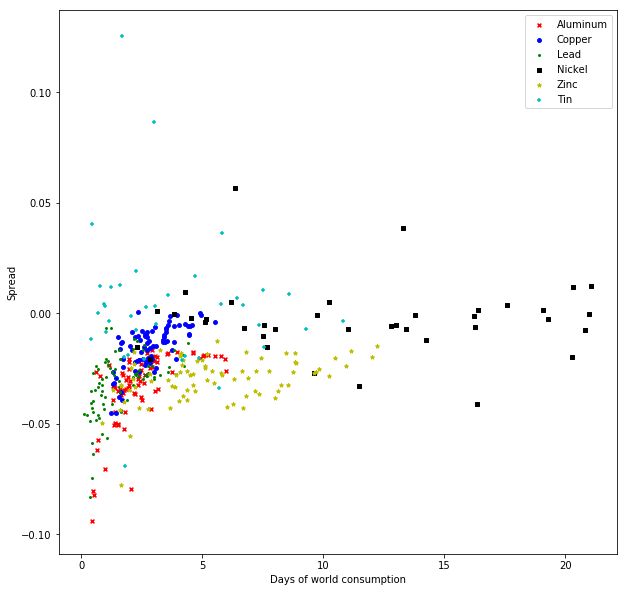

In [56]:
fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
#sValue = inv_al*10
al1 =ax2.scatter(inv_al, spd_al,c='r', s=15, marker="x", label='first')
copper1 =ax2.scatter(inv_copper, spd_copper, c='b',s=15 ,marker="o", label='second')
lead1 = ax2.scatter(inv_lead, spd_lead ,c='g', s=15 ,marker=".", label='third')
nickel1 = ax2.scatter(inv_nickel, spd_nickel,c='k',s=15,  marker="s", label='fourth')
zinc1 = ax2.scatter(inv_zinc, spd_zinc, c='y',s=15, marker="*", label='fifth')
tin1 = ax2.scatter(inv_tin, spd_tin, c='c',s=15 , marker="+", label='fifth')
plt.legend([al1, copper1, lead1, nickel1, zinc1, tin1], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')
plt.xlabel('Days of world consumption')
plt.ylabel('Spread')
plt.savefig('fig_spd.jpg')
plt.show()

In [48]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [49]:
popt_spd_al, pcov_spd_al = curve_fit(func, inv_al, spd_al)
popt_spd_copper, pcov_spd_copper = curve_fit(func, inv_copper, spd_copper)
popt_spd_lead, pcov_spd_lead = curve_fit(func, inv_lead, spd_lead)
popt_spd_nickel, pcov_spd_nickel = curve_fit(func, inv_nickel, spd_nickel)
popt_spd_zinc, pcov_spd_zinc = curve_fit(func, inv_zinc, spd_zinc)
popt_spd_tin, pcov_spd_tin = curve_fit(func, inv_tin, spd_tin)

In [50]:
y_spd_al = [func(i,popt_spd_al[0],popt_spd_al[1],popt_spd_al[2]) for i in inv_al]
y_spd_copper = [func(i,popt_spd_copper[0],popt_spd_copper[1],popt_spd_copper[2]) for i in inv_copper]
y_spd_lead = [func(i,popt_spd_lead[0],popt_spd_lead[1],popt_spd_lead[2]) for i in inv_lead]
y_spd_nickel = [func(i,popt_spd_nickel[0],popt_spd_nickel[1],popt_spd_nickel[2]) for i in inv_nickel]
y_spd_zinc = [func(i,popt_spd_zinc[0],popt_spd_zinc[1],popt_spd_zinc[2]) for i in inv_zinc]
y_spd_tin = [func(i,popt_spd_tin[0],popt_spd_tin[1],popt_spd_tin[2]) for i in inv_tin]

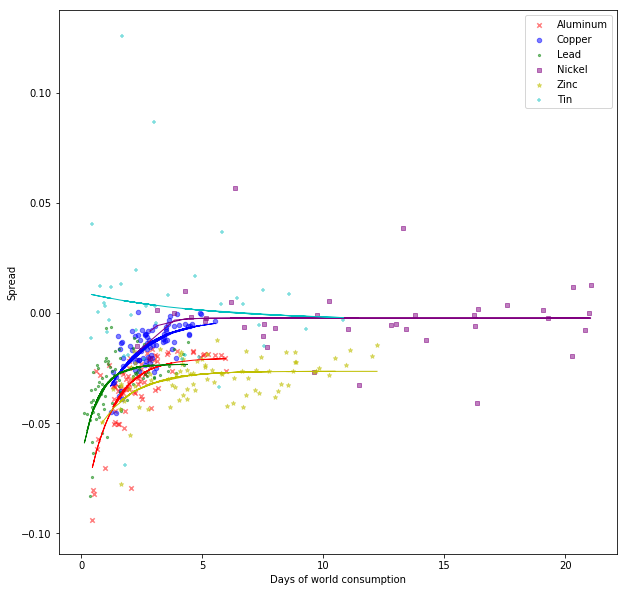

In [57]:
fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
#sValue = inv_al*10
al2=ax2.scatter(inv_al, spd_al,c='r', s=20, marker="x", label='first' ,alpha=.5)
copper2=ax2.scatter(inv_copper, spd_copper, c='b',s=20,marker="o", label='second',alpha=.5)
lead2 =ax2.scatter(inv_lead, spd_lead ,c='g', s=20 ,marker=".", label='third',alpha=.5)
nickel2 = ax2.scatter(inv_nickel, spd_nickel,c='#800080',s=20,  marker="s", label='fourth',alpha=.5)
zinc2 = ax2.scatter(inv_zinc, spd_zinc, c='y',s=20, marker="*", label='fifth',alpha=.5)
tin2 = ax2.scatter(inv_tin, spd_tin, c='c',s=20 , marker="+", label='fifth',alpha=.5)
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')

al3=ax2.plot(inv_al, y_spd_al,c='r', lw=1)
copper3=ax2.plot(inv_copper, y_spd_copper, c='b',  lw=1)
lead3 =ax2.plot(inv_lead, y_spd_lead ,c='g', lw=1)
nickel3 = ax2.plot(inv_nickel, y_spd_nickel,c='#800080' ,lw=1 )
zinc3 = ax2.plot(inv_zinc, y_spd_zinc, c='y',  lw=1)
tin3 = ax2.plot(inv_tin, y_spd_tin, c='c', lw=1)
#plt.legend([al3, copper3, lead3, nickel3, zinc3, tin3], ['Aluminum', 'Copper', 'Lead', 'Nickel1', 'Zinc', 'Tin'], loc='best')

plt.xlabel('Days of world consumption')
plt.ylabel('Spread')
plt.savefig('fit_fig_spd.jpg')
plt.show()

In [54]:
popt_vol_al, pcov_vol_al = curve_fit(func, y_inv_al, vol_al)
popt_vol_copper, pcov_vol_copper = curve_fit(func, y_inv_copper, vol_copper)
popt_vol_lead, pcov_vol_lead = curve_fit(func, y_inv_lead, vol_lead)
popt_vol_nickel, pcov_vol_nickel = curve_fit(func, y_inv_nickel, vol_nickel)
popt_vol_zinc, pcov_vol_zinc = curve_fit(func, y_inv_zinc, vol_zinc)
popt_vol_tin, pcov_vol_tin = curve_fit(func, y_inv_tin, vol_tin)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.